<a href="https://colab.research.google.com/github/aytekin827/DFS-BFS/blob/main/DFS_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이코테


## DFS(depth First Search) - 깊이 우선 탐색
**스택(stack)**의 개념이 사용된다 

=> 재귀함수로도 구현이 가능함

O(N)

In [ ]:
# DFS 매서드 정의

def dfs(gragh,v,visited):
    # 현재 노드를 방문처리
    visited[v] = True
    print(v,end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in gragh[v]:
        if not visited[i]:
            dfs(gragh,i,visited)

# 리스트 자료형으로 그래프를 표현
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

dfs(gragh,1,visited)

1 2 7 6 8 3 4 5 

In [ ]:
# 음료수 얼려먹기 - 몇개의 아이스크림이 나오느냐
# DFS

# n=세로길이, m=가로길이
n,m = map(int,input().split())

gragh = []
for i in range(n):
    gragh.append(list(map(int,input())))

def dfs(x,y):
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False

    if gragh[x][y] == 0:
        gragh[x][y] = 1

        # 재귀적으로 dfs함수를 호출해줌 - 근데 왜 이게 dfs함수 개념이 되는거지? 어디에서 dfs개념이 쓰였다는거?
        dfs(x-1,y)
        dfs(x+1,y)
        dfs(x,y-1)
        dfs(x,y+1)
        return True
    return False

result = 0
for i in range(n):
    for j in range(m):
        if dfs(i,j) == True:
            result += 1

print(result)

3 3
101
010
111
3


## BFS(Breadth First Search) - 넓이 우선 탐색
**큐(queue)** 자료구조 사용한다.  

O(N)

실제 수행시간은 DFS보다 좋다. **(BFS > DFS)**

from collection import deque

In [ ]:
# BFS 매서드 정의

from collections import deque

def bfs(gragh,start,visited):
    # 큐(Queue) 구현을 위해 deque라이브러리 사용
    queue = deque([start])
    # 현재 노드를 방문 처리
    visited[start] = True
    # 큐가 빌때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v,end=' ')
        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in gragh[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9
bfs(gragh,1,visited)

1 2 3 8 7 4 5 6 

In [ ]:
# 미로탈출
# bfs 이용
# 큐(Queue)

n,m = map(int,input().split())

gragh = []
for i in range(n):
    gragh.append(list(map(int,input())))

from collections import deque

# 상하좌우 좌표
dx = [-1,1,0,0]
dy = [0,0,-1,1]

def bfs(x,y):
    queue = deque()
    queue.append((x,y))
    while queue:
        x,y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            # 미로찾기에서 공간을 벗어난 경우 무시
            if nx < 0 or ny < 0 or nx >= n or ny >= m: 
                continue
            # 벽인 경우 무시
            if gragh[nx][ny] == 0:
                continue
            if gragh[nx][ny] == 1:
                gragh[nx][ny] = gragh[x][y]+1
                queue.append((nx,ny))
    return gragh[n-1][m-1]
print(bfs(0,0))
print(gragh)
# 이게 왜 BFS와 연관이 있는건지? 큐 자료구조를 사용했기 때문에?

5 6
101010
111111
000001
111111
111111
10
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 8], [14, 13, 12, 11, 10, 9], [15, 14, 13, 12, 11, 10]]


# 코드스테이츠 - n533

## DFS

**재귀(recursion) vs 스텍(stack)**


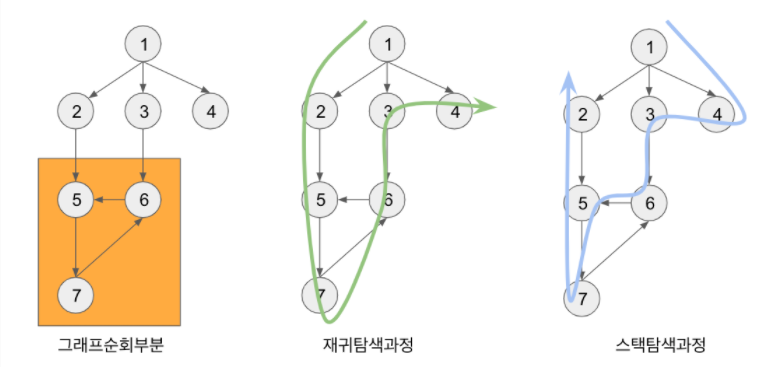


In [ ]:
# 재귀함수를 이용해서
def dfs_recur(node, dfs_graph, dfs_list=[]):
    dfs_list.append(node)   # 리스트에 인접한 노드를 덧붙이는 형태
    for i in dfs_graph[node]:   # 노드의 인접한 노드를 기준으로 반복한다. 
        if i not in dfs_list:
            dfs_recur(i,dfs_graph,dfs_list)
    return dfs_list

if __name__ == '__main__':
    dfs_graph = {
        1: [2,3,4],
        2: [5],
        3: [6],
        4: [],
        5: [7],
        6: [5],
        7: [6],
    }
    print(dfs_recur(1, dfs_graph, dfs_list=[]))
    # => [1, 2, 5, 7, 6, 3, 4]
#     dfs_graph = {   # 그래프를 인접리스트로 표현
#     16: [12,13],
#     12: [11,14],
#     13: [19],
#     11: [9],
#     9: [91,92],
#     91: [],
#     92: [],
#     14: [],
#     13: [19],
#     19: [15,20],
#     15: [],
#     20: [],
# }
#     print(dfs_recur(16, dfs_graph, dfs_list=[]))


[1, 2, 5, 7, 6, 3, 4]


In [ ]:
# 스택을 활용한 DFS 구현하기 
def dfs_stack(start_node, dfs_graph):
    dfs_list = []
    stack_list = [start_node]
    while stack_list:
        node = stack_list.pop() # 리스트 메소드        
        if node not in dfs_list:
            dfs_list.append(node)
            stack_list.extend(dfs_graph[node])
    return dfs_list 

if __name__ == '__main__':
    dfs_graph = {
        1: [2,3,4],
        2: [5],
        3: [6],
        4: [],
        5: [7],
        6: [5],
        7: [6],
    }
    print(dfs_stack(1, dfs_graph))
    # => [1, 4, 3, 6, 5, 7, 2]

[1, 4, 3, 6, 5, 7, 2]


## BFS



In [ ]:
# 우선 deque를 위해 자료구조의 큐에서 배웠던 내용을 복습한다.

from collections import deque
queue = deque(["Eric", "John", "Michael"])
print(queue)
queue.append("Terry")        # append : 오른쪽끝 삽입   
print(queue)
queue.appendleft("Graham")   # appendleft : 왼쪽 끝 삽입       
print(queue)
print(queue.pop())           # pop : 오른쪽 끝 빼오기
print(queue)
print(queue.popleft())       # popleft : 왼쪽끝 빼오기           
print(queue)             
queue.extend([1])
print(queue)             
queue.append([1])
queue              

deque(['Eric', 'John', 'Michael'])
deque(['Eric', 'John', 'Michael', 'Terry'])
deque(['Graham', 'Eric', 'John', 'Michael', 'Terry'])
Terry
deque(['Graham', 'Eric', 'John', 'Michael'])
Graham
deque(['Eric', 'John', 'Michael'])
deque(['Eric', 'John', 'Michael', 1])


deque(['Eric', 'John', 'Michael', 1, [1]])

In [ ]:
def bfs_queue(start_node,bfs_graph):
  bfs_list = [start_node]
  queue = [start_node]
  #외부반복문
  while queue:
    node = queue.pop(0)
    # 내부반복문
    for i in bfs_graph[node]: 
        if i not in bfs_list:
            queue.append(i)
            bfs_list.append(i)

  return bfs_list

if __name__ == '__main__':
    bfs_graph = { 
        1: [2,3,4],
        2: [5],
        3: [6],
        4: [],
        5: [7],
        6: [5],
        7: [6],
    }
    print(bfs_queue(2, bfs_graph))

[2, 5, 7, 6]


# 백준 문제 - DFS/BFS

In [ ]:
# 1260번

# 입력값을 받는 부분
# 인접행렬로 그래프를 표현하였다.
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for i in range(n+1):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

# DFS구현
visited_dfs = [0]*(n+1)
def dfs(v):
    visited_dfs[v] = 1                         # 방문처리
    print(v,end=' ')                         
    for i in range(n+1):
        if visited_dfs[i]==0 and graph[i][v]:  # 방문했었는지, 그리고 간선이 있는지 확인
        dfs(i)							       # 재귀함수 호출
dfs(v)

# BFS구현
visited_bfs = [0] * (n+1)
from collections import deque
def bfs(v):
    visited_bfs[v] = 1                         # 방문처리
    queue = deque()
    queue.append(v) 						   # 큐에 노드 삽입
    while queue:							   # 큐에 노드가 없을때까지 반복
        node = queue.popleft()                 # 큐에서 빼주기
        print(node,end=' ')
        for i in range(n+1):
            if visited_bfs[i] == 0 and graph[i][node]: # 방문했었는지, 그리고 간선이 있는지 확인
                queue.append(i)                        # 큐에 노드 삽입
                visited_bfs[i] = 1				       # 방문처리
print()
bfs(v)

4 5 1
1 2
 1 3
1 4
2 4
3 4
1 1
2 2
3 3
4 
1 2 3 4 

In [ ]:
# 2606번 바이러스 - dfs

n = int(input())
m = int(input())
graph = [[0]*(n+1) for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited = [0]*(n+1)

def dfs(v):
    visited[v] = 1
    for i in range(n+1):
        if graph[i][v] == 1 and visited[i] == 0:
            dfs(i)
dfs(1)

print(sum(visited)-1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


In [ ]:
# 2606번 바이러스 - bfs

n = int(input())
m = int(input())
graph = [[0]*(n+1) for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited = [0]*(n+1)

from collections import deque
def bfs(v):
    visited[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        for i in range(n+1):
            if graph[i][node] == 1 and visited[i] == 0:
                queue.append(i)
                visited[i] = 1
bfs(1)

print(sum(visited)-1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


In [ ]:
# 2667 단지번호붙이기

# 입력값
n = int(input())
# 그래프
graph = []
for _ in range(n):
    graph.append(list(map(int,input())))

# dfs함수 정의
def dfs(x,y,apt_num):
    if x < 0 or x > n-1 or y < 0 or y > n-1:
        return False
    if graph[x][y] == 1:
        graph[x][y] = apt_num
        dfs(x,y+1,apt_num) # 상
        dfs(x,y-1,apt_num) # 하
        dfs(x-1,y,apt_num) # 좌
        dfs(x+1,y,apt_num) # 우
        return True
    else:
        return False

# 단지의 개수, 단지별 서로다른 숫자 할당하기
result = 0
apt_num = 2 
for x in range(n):
    for y in range(n):
        if dfs(x,y,apt_num) == True:
            apt_num += 1
            result += 1

# 아파트 단지별로 아파트 숫자 카운트
homes = []
for apt_num in range(2,result+2):
    count = 0
    for i in graph:
        for j in i:
            if apt_num == j:
                count += 1
    homes.append(count)
homes.sort()   

# 결과 출력
print(result)
for i in homes:
    print(i)

7
0110100
0110101
1110101
0000111
0100000
0111110
0111000
3
7
8
9


In [ ]:
# 1012 유기농 배추 - dfs/bfs탐색
import sys
sys.setrecursionlimit(10 ** 6)
t = int(input())

def dfs(x,y):
    if x < 0 or x > n-1 or y < 0 or y > m-1:
        return False
    if graph[x][y] == 1:
        graph[x][y] = 0
        dfs(x-1,y) # 상
        dfs(x+1,y) # 하
        dfs(x,y-1) # 좌
        dfs(x,y+1) # 우
        return True
    return False

for _ in range(t):
    m,n,k = map(int,input().split()) # m=가로, n=세로, k=배추개수
    graph = [[0]*(m) for _ in range(n)]
    for _ in range(k):
        a,b = map(int,input().split())
        graph[b][a] = 1
    
    res = 0
    for y in range(m):
        for x in range(n):
            if dfs(x,y) == True:
                res += 1

    print(res)

In [ ]:
# 2178 미로 탐색 - 최단거리

n,m = map(int,input().split())
graph = []
for _ in range(n):
    graph.append(list(map(int,input())))

arrow = [[-1,0],[1,0],[0,-1],[0,1]] # 상하좌우
from collections import deque
def bfs(x,y,step=1):
    q = deque()
    q.append([x,y])
    while q:
        node = q.popleft()

        for i in arrow:
            new_node = [x+y for x,y in zip(node,i)]
            if new_node[0] < 0 or new_node[1] < 0 or new_node[0] > n-1 or new_node[1] > m-1:
                continue 
            if graph[new_node[0]][new_node[1]] == 1:
                q.append(new_node)
                graph[new_node[0]][new_node[1]] = graph[node[0]][node[1]] + 1

bfs(0,0)
print(graph[n-1][m-1])

4 6
101111
101010
101011
111011
15


In [ ]:
# 7576 토마토

m,n = map(int,input().split())
graph = []
for _ in range(n):
    graph.append(list(map(int,input().split())))

arrow = [[-1,0],[1,0],[0,-1],[0,1]] # 상하좌우

from collections import deque
def bfs_tomato(m,n,graph,cnt=0):

    # 모든 토마토가 이미 채워져 있는 경우
    test = set()
    for x in range(n):
        for y in range(m):
            test.add(graph[x][y])
    if 0 not in test:
        return 0
    
    queue = deque()
    
    for x in range(n):
        for y in range(m):
            if graph[x][y] == 1:
                queue.append([x,y])
          
    while queue:
        cnt += 1
        for _ in range(len(queue)):
            tomato = queue.popleft()
            for i in arrow:
                new = [x+y for x,y in zip(tomato,i)]
                if new[0] < 0 or new[0] > n-1 or new[1] < 0 or new[1] > m-1:
                    continue
                if graph[new[0]][new[1]] == 0:
                    queue.append(new)
                    graph[new[0]][new[1]] = 1
        # print(f'queue:{queue},count:{cnt}')
     
    for x in range(n):
        for y in range(m):
            if not bool(graph[x][y]):
                return -1
    return cnt-1

print(bfs_tomato(m,n,graph))

2 2 
1 -1 
-1 1
0


In [ ]:
# 7569 토마토 3차원 문제
# 시간초과가 났음 
# 더 심각한것은 왜 시간초과가 났는지 모르겠음...!!!
import sys
input = sys.stdin.readline
m,n,h = map(int,input().split())
graph = [[] for _ in range(h)]
for i in range(h):
    for _ in range(n):
        graph[i].append(list(map(int,input().split())))
# graph[층h][가로m][세로n]

arrow = [[1,0,0],
         [-1,0,0],
         [0,-1,0],
         [0,1,0],
         [0,0,-1],
         [0,0,1]] # 상 하 좌 우 위 아래

from collections import deque
def bfs_tomato(m,n,h,graph,cnt=0):

    # 모든 토마토가 이미 채워져 있는 경우
    queue = deque()
    test = set()
    for z in range(h):
        for x in range(n):
            for y in range(m):
                if graph[z][x][y] == 1:
                    queue.append([z,x,y])
                test.add(graph[z][x][y])
    if 0 not in test:
        return 0

    while queue:
        cnt += 1
        for _ in range(len(queue)):
            tomato = queue.popleft()
            for i in arrow:
                new = [x+y for x,y in zip(tomato,i)]
                if new[0] < 0 or new[0] > h-1 or new[1] < 0 or new[1] > n-1 or new[2] < 0 or new[2] > m-1:
                    continue
                if graph[new[0]][new[1]][new[2]] == 0:
                    queue.append(new)
                    graph[new[0]][new[1]][new[2]] = 1
        # print(f'queue:{queue},count:{cnt}') 출력확인용
     
    for z in range(h):
        for x in range(n):
            for y in range(m):
                if not bool(graph[z][x][y]):
                    return -1
    return cnt-1

print(bfs_tomato(m,n,h,graph))

4 3 2
1 1 1 1 
1 1 1 1 
1 1 1 1 
1 1 1 1 
-1 -1 -1 -1 
1 1 1 1 
0


In [ ]:
# 3차원 토마토문제 구글링한것

from collections import deque

def BFS():
    while Q:
        x,y,z = Q.popleft()

        for i in range(6):
            nx, ny, nz = x + dx[i], y + dy[i], z + dz[i]

            if 0 <= nx < H and 0 <= ny < N and 0 <= nz < M:
                if arr[nx][ny][nz] == 0:
                    arr[nx][ny][nz] = arr[x][y][z] + 1
                    Q.append((nx,ny,nz))


M, N, H = map(int, input().split())
arr = [[] for _ in range(H)]
for i in range(H):
    for _ in range(N):
        arr[i].append(list(map(int, input().split())))

dx = [0,0,0,0,1,-1]
dy = [0,0,1,-1,0,0]
dz = [1,-1,0,0,0,0]

answer = 0
Q = deque()

for i in range(H):
    for j in range(N):
        for k in range(M):
            if arr[i][j][k] == 1:
                Q.append((i,j,k))

BFS()
Flag = False

for i in range(H):
    for j in range(N):
        for k in range(M):

            if arr[i][j][k] == 0:
                Flag = True
                break
            answer = max(answer, arr[i][j][k])

if Flag:
    answer = -1
elif answer == -1:
    answer = 0
else:
    answer -= 1

print(answer)

In [ ]:
from collections import deque
import sys
input = sys.stdin.readline
def bfs():
    while queue:
        x,y = queue.popleft()
        for step in range(8):
            nx,ny = x + dx[step], y+dy[step]
            if 0<=nx<i and 0<=ny<i and graph[nx][ny]== 0:  
                    queue.append((nx,ny))
                    graph[nx][ny] = graph[x][y]+1
# 7562 나이트의 이동
case = int(input())
# 나이트의 이동경로
dx = [-1,-2,-2,-1,1,2,2,1]
dy = [2,1,-1,-2,-2,-1,1,2]
for _ in range(case):
    i = int(input())
    a,b = map(int,input().split())
    c,d = map(int,input().split())
    graph = [[0]*i for _ in range(i)]
    queue = deque()
    queue.append((a,b))
    bfs()
    if (a,b) == (c,d):
        print(0)
    else:
        print(graph[c][d])

1
10
1 1
1 1
0


In [ ]:
from collections import deque
import sys
input = sys.stdin.readline
dx = [-1, -2, -2, -1, 1, 2, 2, 1]
dy = [2, 1, -1, -2, -2, -1, 1, 2]
def bfs(sx, sy, ax, ay):
    q = deque()
    q.append([sx, sy])
    s[sx][sy] = 1
    while q:
        a, b = q.popleft()
        if a == ax and b == ay:
            print(s[ax][ay] -1)
            return
        for i in range(8):
            x = a + dx[i]
            y = b + dy[i]
            if 0 <= x < n and 0 <= y < n and s[x][y] == 0:
                q.append([x, y])
                s[x][y] = s[a][b] + 1
t = int(input())
for i in range(t):
    n = int(input())
    sx, sy = map(int, input().split())
    ax, ay = map(int, input().split())
    s = [[0] * n for i in range(n)]
    bfs(sx, sy, ax, ay)

In [ ]:
graph

[[2, 3, 6, 0, 0, 0, 0, 0],
 [3, 4, 1, 4, 7, 0, 0, 0],
 [2, 1, 4, 5, 2, 5, 8, 0],
 [3, 2, 3, 2, 5, 6, 3, 6],
 [2, 3, 2, 3, 4, 3, 6, 7],
 [3, 4, 3, 4, 3, 4, 5, 4],
 [0, 3, 4, 3, 4, 5, 4, 5],
 [0, 0, 0, 4, 5, 4, 5, 6]]

# 연습장


In [ ]:
def dfs(gragh,v,visited):
    visited[v] = True
    print(v,end=' ')
    for i in gragh[v]:
        if not visited[i]:
            dfs(gragh,i,visited)

# 리스트 자료형으로 그래프를 표현
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

dfs(gragh,1,visited)

1 2 7 6 8 3 4 5 

In [ ]:
from collections import deque

def bfs(gragh,v,visited):
    queue = deque([v])
    visited[v] = True
    while queue:
        v = queue.popleft()
        print(v,end=' ')
        for i in gragh[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

# # BFS 매서드 정의

# from collections import deque

# def bfs(gragh,start,visited):
#     # 큐(Queue) 구현을 위해 deque라이브러리 사용
#     queue = deque([start])
#     # 현재 노드를 방문 처리
#     visited[start] = True
#     # 큐가 빌때까지 반복
#     while queue:
#         # 큐에서 하나의 원소를 뽑아 출력
#         v = queue.popleft()
#         print(v,end=' ')
#         # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
#         for i in gragh[v]:
#             if not visited[i]:
#                 queue.append(i)
#                 visited[i] = True

# 리스트 자료형으로 그래프를 표현
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

bfs(gragh,1,visited)

1 2 3 8 7 4 5 6 

In [ ]:
# dfs

def dfs(gragh,v,visited):
    visited[v] = True
    print(v,end=' ')
    for i in gragh[v]:
        if not visited[i]:
            dfs(gragh,i,visited)
            
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

dfs(gragh,1,visited)

1 2 7 6 8 3 4 5 

In [ ]:
from collections import deque

def bfs(gragh,v,visited):
    visited[v] = True
    queue = deque([v])
    while queue:
        v = queue.popleft()
        print(v,end=' ')
        for i in gragh[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

bfs(gragh,1,visited)

1 2 3 8 7 4 5 6 

In [ ]:
# 백준 dfs/bfs

n,m,v = map(int,input().split())
graph=[]
for _ in range(m):
    graph.append(list(map(int,input().split())))
graph


2 3 4
1 2
1 3
2 3


[[1, 2], [1, 3], [2, 3]]

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited = [0]*(n+1)
def dfs(v):
    visited[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if visited[i] == 0 and graph[v][i] == 1:
            dfs(i)

dfs(v)

from collections import deque
bfs_visited = [0] * (n+1)
def bfs(v):
    queue = deque()
    queue.append(v)
    bfs_visited[v] = 1
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if bfs_visited[i] == 0 and graph[i][node]:
                queue.append(i)
                bfs_visited[i] = 1
print()
bfs(v)

5 5 3
5 4
5 2
1 2
3 4
3 1
3 1 2 5 4 
3 1 4 2 5 

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1 # 인접행렬 방식으로 표현

visited = [0] * (n+1)
def dfs(v):
    visited[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if visited[i] == 0 and graph[i][v] == 1:
            dfs(i)
dfs(v)
print()

from collections import deque
bfs_visited = [0] * (n+1)
def bfs(v):
    bfs_visited[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if bfs_visited[i] == 0 and graph[i][node]:
                queue.append(i)
                bfs_visited[i] = 1

bfs(v)

4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for i in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited_dfs = [0]*(n+1)
def dfs(v):
    visited_dfs[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if visited_dfs[i] == 0 and graph[i][v]:
            dfs(i)
dfs(v)

from collections import deque
visited_bfs = [0] * (n+1)
def bfs(v):
    visited_bfs[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if visited_bfs[i] == 0 and graph[node][i]:
                queue.append(i)
                visited_bfs[i] = 1
print()
bfs(v)



4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for i in range(n+1):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited_dfs = [0]*(n+1)
def dfs(v):
    visited_dfs[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if visited_dfs[i]==0 and graph[i][v]:
            dfs(i)
dfs(v)

visited_bfs = [0] * (n+1)
from collections import deque
def bfs(v):
    visited_bfs[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if visited_bfs[i] == 0 and graph[i][node]:
                queue.append(i)
                visited_bfs[i] = 1
print()
bfs(v)


4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for _ in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited_dfs = [0] * (n+1)
def dfs(v):
    visited_dfs[v]=1
    print(v,end=' ')
    for i in range(n+1):
        if graph[v][i] == 1 and visited_dfs[i] == 0:
            dfs(i)
dfs(v)
print()

from collections import deque
visited_bfs = [0] * (n+1)
def bfs(v):
    queue = deque()
    queue.append(v)
    visited_bfs[v] = 1
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if graph[i][node] == 1 and visited_bfs[i] == 0:
                queue.append(i)
                visited_bfs[i] = 1
bfs(v)

4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 

In [ ]:
m,n,v = map(int,input().split())
graph = [[0]*(n+1) for i in range(n+1)]
for i in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

visited_dfs = [0] * (n+1)
def dfs(v):
    visited_dfs[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if graph[i][v] == 1 and visited_dfs[i] == 0:
            dfs(i)
dfs(v)
print()

from collections import deque
visited_bfs = [0] *(n+1)
def bfs(v):
    visited_bfs[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
            if graph[i][node] == 1 and visited_bfs[i] == 0:
                queue.append(i)
                visited_bfs[i] = 1
bfs(v)

5 5 3
5 4
5 2
1 2
3 4
3 1
3 1 2 5 4 
3 1 4 2 5 

In [ ]:
n,m,v = map(int,input().split())
graph = [[0]*(n+1) for _ in range(n+1)]
for i in range(m):
    a,b = map(int,input().split())
    graph[a][b] = graph[b][a] = 1

from collections import deque
visited_bfs = [0] * (n+1)
visited_dfs = [0] * (n+1)

def dfs(v):
    visited_dfs[v] = 1
    print(v,end=' ')
    for i in range(n+1):
        if graph[v][i] == 1 and visited_dfs[i] == 0:
            dfs(i)

def bfs(v):
    visited_bfs[v] = 1
    queue = deque()
    queue.append(v)
    while queue:
        node = queue.popleft()
        print(node,end=' ')
        for i in range(n+1):
           if graph[i][node] == 1 and visited_bfs[i] == 0:
               queue.append(i)
               visited_bfs[i] = 1

dfs(v)
print()
bfs(v) 

5 5 3
5 4
5 2
1 2
3 4
3 1
3 1 2 5 4 
3 1 4 2 5 

In [ ]:
# 리스트 자료형으로 그래프를 표현
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

def dfs(graph,v,visited):
    visited[v] = True
    print(v,end=' ')
    for i in range(9):
        if visited[i] == False and i in graph[v]:
            visited[i] = True
            dfs(graph,i,visited)

dfs(gragh,1,visited)

1 2 7 6 8 3 4 5 

In [ ]:
# 리스트 자료형으로 그래프를 표현
gragh = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

visited = [False] * 9

from collections import deque
def bfs(graph,v,visited):
    q = deque()
    q.append(v)
    visited[v] = True
    while q:
        node = q.popleft()
        print(node,end=' ')
        for i in range(9):
            if visited[i] == False and i in graph[node]:
                q.append(i)
                visited[i] = True
bfs(gragh,1,visited)

1 2 3 8 7 4 5 6 